# Minimizing Loan Loss: A Predictive Strategy for Credit Card Risk

### Project Objective
The goal of this project is to develop a robust machine learning model that accurately predicts whether a credit card customer will default on their next month's payment. This involves a complete workflow from data cleaning and exploratory analysis to feature engineering, model training, and hyperparameter tuning. The final model is optimized for the **F2 score**, a metric that heavily prioritizes identifying as many true defaulters as possible, which is critical for minimizing financial losses.

### Workflow
1.  **Initial Setup & Data Loading:** Import libraries and load the dataset.
2.  **Data Cleaning & EDA:** Handle inconsistencies, explore data distributions, and analyze relationships between features and the target variable to uncover key insights.
3.  **Feature Engineering:** Create new, powerful features based on EDA findings to improve model performance.
4.  **Preprocessing & Modeling:** Prepare the data for machine learning and train multiple models (Logistic Regression, XGBoost, CatBoost) to establish a performance baseline.
5.  **Hyperparameter Tuning & Optimization:** Select the champion model (CatBoost) and use `RandomizedSearchCV` to find the optimal hyperparameters.
6.  **Threshold Tuning & Final Evaluation:** Optimize the classification threshold to maximize the F2 score and evaluate the final model's performance.
7.  **Submission Generation:** Use the final, tuned model to generate predictions on the unlabeled validation dataset.

---
## Phase 1: Setup & Initial Data Analysis
In this phase, we set up our environment by importing the necessary libraries and load the training and validation datasets. We then perform an initial "sanity check" to understand the data's structure, identify any missing values, and confirm the class imbalance, which is a core challenge of this problem.

In [2]:
# Step 1.1: Environment Setup

# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)

import warnings
warnings.filterwarnings("ignore")

print("Libraries imported successfully!")

Libraries imported successfully!


In [3]:
# Step 1.2: Data Loading

# Load the training and validation datasets
df = pd.read_csv('train_dataset_final1.csv')
val = pd.read_csv('validate_dataset_final.csv')

# Convert column names to lowercase for consistency
df.columns = df.columns.str.lower()
df.head()


,customer_id,marriage,sex,education,limit_bal,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,avg_bill_amt,pay_to_bill_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,0,0,60323.86,60728.22,56472.74,28602.01,22191.53,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,-1,0,11157.67,0.00,0.88,0.65,2700.96,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,0,0,47930.96,48921.91,50034.26,50748.90,51902.56,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,0,0,91152.44,92916.01,90652.30,85295.56,80416.75,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,-2,-2,19666.40,999.04,3186.48,44932.48,2099.77,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [4]:
# Get a summary of the dataframe, including data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         25247 non-null  int64  
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   limit_bal           25247 non-null  int64  
 5   age                 25121 non-null  float64
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  bill_amt1           25247 non-null  float64
 13  bill_amt2           25247 non-null  float64
 14  bill_amt3           25247 non-null  float64
 15  bill_amt4           25247 non-null  float64
 16  bill

In [5]:
# Fix missing values in 'age' column
df['age'].fillna(df['age'].median(), inplace=True)

In [6]:
# Generate descriptive statistics for numerical columns
df.describe()

,customer_id,marriage,sex,education,limit_bal,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,avg_bill_amt,pay_to_bill_ratio,next_month_default
count,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000
mean,17640.000000,1.551907,0.604111,1.852101,168342.060443,35.431022,-0.042857,-0.159544,-0.190359,-0.241415,-0.282568,-0.307680,51170.887938,49092.268745,4.695839e+04,43134.911103,40218.976171,38806.221029,5718.624966,6.047352e+03,5288.910651,4865.960834,4906.766828,5270.499287,44859.647485,0.362962,0.190399
std,7288.325459,0.522629,0.489050,0.797379,129892.784807,9.152635,1.099315,1.173990,1.172636,1.146753,1.114213,1.130864,73250.806650,70695.367650,6.895687e+04,63846.205694,60389.690737,59182.792531,16806.842125,2.400962e+04,17851.879609,15979.116544,15860.726852,17960.816915,62819.226119,5.047206,0.392624
min,5017.000000,0.000000,0.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-56043.170000,-546.930000,0.000000
25%,11328.500000,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3601.340000,3017.155000,2.753275e+03,2319.615000,1770.625000,1241.710000,999.985000,9.219100e+02,399.990000,300.150000,262.365000,130.070000,4858.670000,0.040000,0.000000
50%,17640.000000,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22436.740000,21245.880000,2.008554e+04,19027.840000,18069.760000,17102.580000,2145.020000,2.026830e+03,1844.300000,1500.100000,1513.790000,1500.040000,21102.830000,0.090000,0.000000
75%,23951.500000,2.000000,1.000000,2.000000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67373.410000,64151.875000,6.022971e+04,54391.160000,50289.525000,49245.195000,5031.150000,5.000190e+03,4600.640000,4014.990000,4099.890000,4018.780000,57136.580000,0.590000,0.000000
max,30263.000000,3.000000,1.000000,6.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,7.000000,7.000000,8.000000,964511.160000,983931.050000,1.664089e+06,891585.580000,927172.770000,961663.620000,873551.980000,1.684259e+06,896040.150000,621000.080000,426529.180000,528666.150000,877313.830000,205.380000,1.000000


In [7]:
# Check the distribution of the target variable
print("Distribution of the target:")
print(df['next_month_default'].value_counts())
print("\nDistribution as a percentage:")
print(df['next_month_default'].value_counts(normalize=True))

Distribution of the target:
next_month_default
0    20440
1     4807
Name: count, dtype: int64

Distribution as a percentage:
next_month_default
0    0.809601
1    0.190399
Name: proportion, dtype: float64


---
## Phase 2: Exploratory Data Analysis (EDA) & Financial Insights
This is the most critical analytical phase. The goal is to go beyond surface-level statistics to understand the underlying drivers of credit default. We will clean inconsistent data, visualize distributions, and, most importantly, analyze how different customer behaviors and demographics correlate with the likelihood of default. The insights gained here will directly inform our feature engineering strategy.

### Step 2.1: Data Cleaning
Before analysis, we must address inconsistencies in the data to ensure quality. The `EDUCATION` and `MARRIAGE` columns contain undocumented values (e.g., 0, 5, 6). We will group these into the 'Others' category to align with the provided data dictionary. Additionally, we will handle records with negative values in pre-calculated ratio columns, as these are likely data entry errors.

In [8]:
# Step 2.1.1: Clean "Dirty" Categorical Data

# --- EDUCATION Column ---
print("Original unique values in EDUCATION:", df['education'].unique())

# Grouping undefined values (0, 5, 6) into 'Others' (4)
df['education'] = df['education'].replace([0, 5, 6], 4)

print("Cleaned unique values in EDUCATION:", df['education'].unique())


# --- MARRIAGE Column ---
print("\nOriginal unique values in MARRIAGE:", df['marriage'].unique())

# Grouping undefined value (0) into 'Others' (3)
df['marriage'] = df['marriage'].replace(0, 3)

print("Cleaned unique values in MARRIAGE:", df['marriage'].unique())

Original unique values in EDUCATION: [2 1 3 4 5 6 0]
Cleaned unique values in EDUCATION: [2 1 3 4]

Original unique values in MARRIAGE: [2 1 3 0]
Cleaned unique values in MARRIAGE: [2 1 3]


In [9]:
# Step 2.1.2: Handling Negative Values in Financial Metrics

# check for negative values in a AVG_Bill_amt and PAY_TO_BILL_ratio
print("\nNegative values:")
print(df[df['pay_to_bill_ratio'] < 0].shape)
print(df[df['avg_bill_amt'] < 0].shape)

# Remove negative values from AVG_Bill_amt and PAY_TO_BILL_ratio
df = df[(df["pay_to_bill_ratio"] >= 0)]
df = df[(df["avg_bill_amt"] >= 0)]

print("\nAfter removing negative values:")
print(df[df['pay_to_bill_ratio'] < 0].shape)
print(df[df['avg_bill_amt'] < 0].shape)


Negative values:
(105, 27)
(170, 27)

After removing negative values:
(0, 27)
(0, 27)


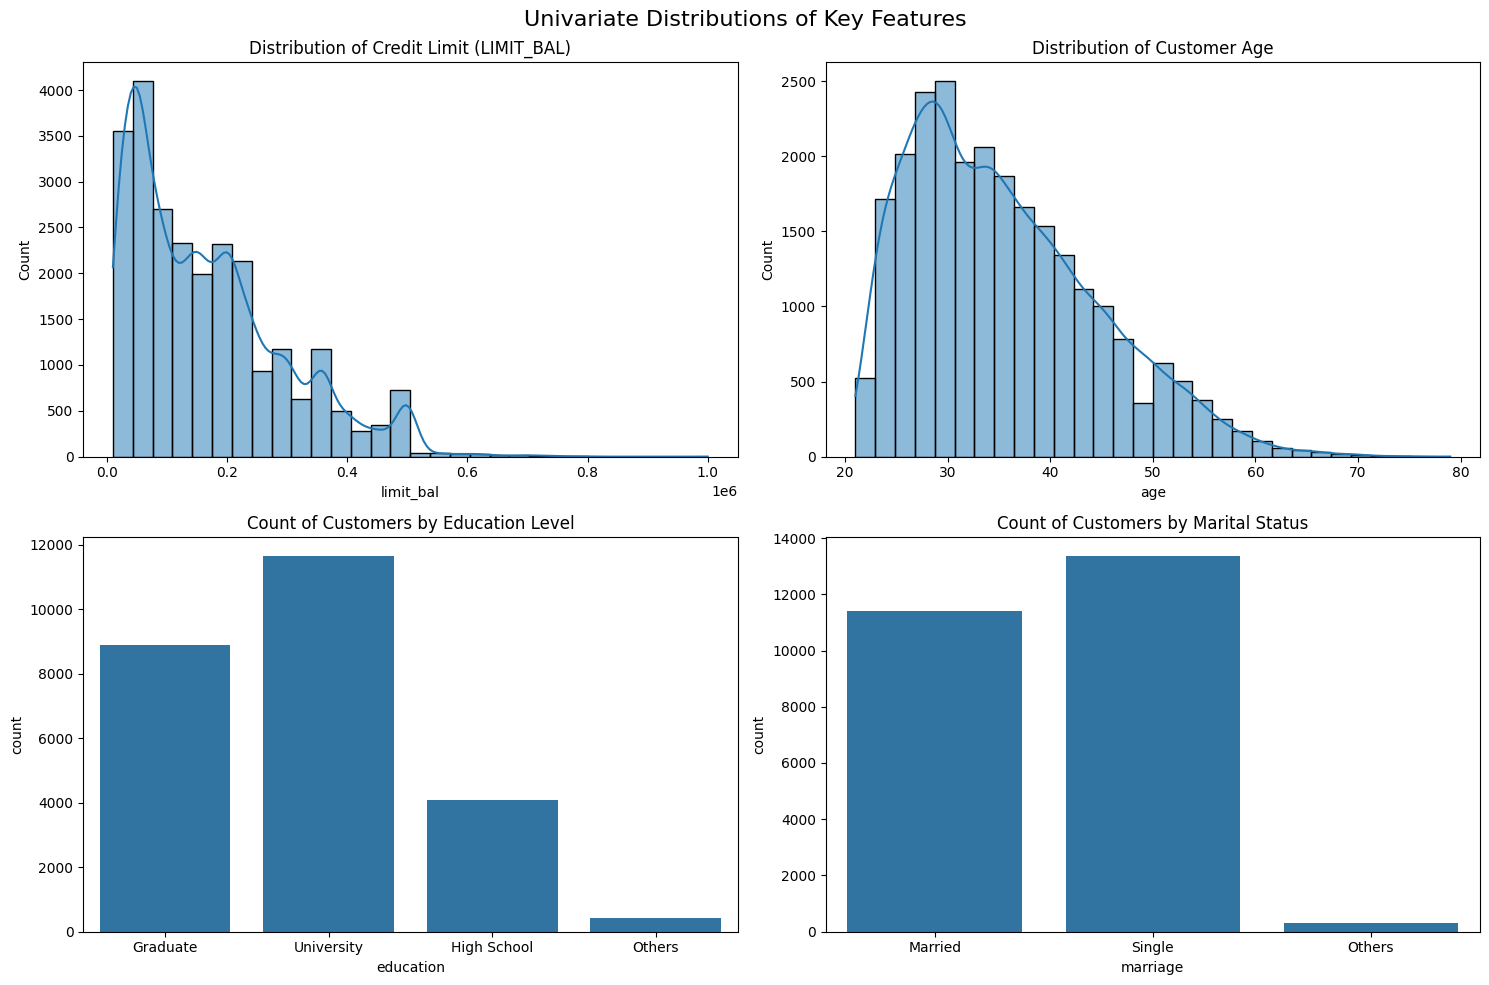

In [10]:
# Step 2.2: Univariate Analysis (Single Variable Distributions)

# Set up the figure and axes for subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Univariate Distributions of Key Features', fontsize=16)

# Plot for LIMIT_BAL
sns.histplot(ax=axes[0, 0], data=df, x='limit_bal', bins=30, kde=True)
axes[0, 0].set_title('Distribution of Credit Limit (LIMIT_BAL)')

# Plot for AGE
sns.histplot(ax=axes[0, 1], data=df, x='age', bins=30, kde=True)
axes[0, 1].set_title('Distribution of Customer Age')

# Plot for EDUCATION
sns.countplot(ax=axes[1, 0], data=df, x='education')
axes[1, 0].set_title('Count of Customers by Education Level')
axes[1, 0].set_xticklabels(['Graduate', 'University', 'High School', 'Others']) # More readable labels

# Plot for MARRIAGE
sns.countplot(ax=axes[1, 1], data=df, x='marriage')
axes[1, 1].set_title('Count of Customers by Marital Status')
axes[1, 1].set_xticklabels(['Married', 'Single', 'Others']) # More readable labels

plt.tight_layout()
plt.show()

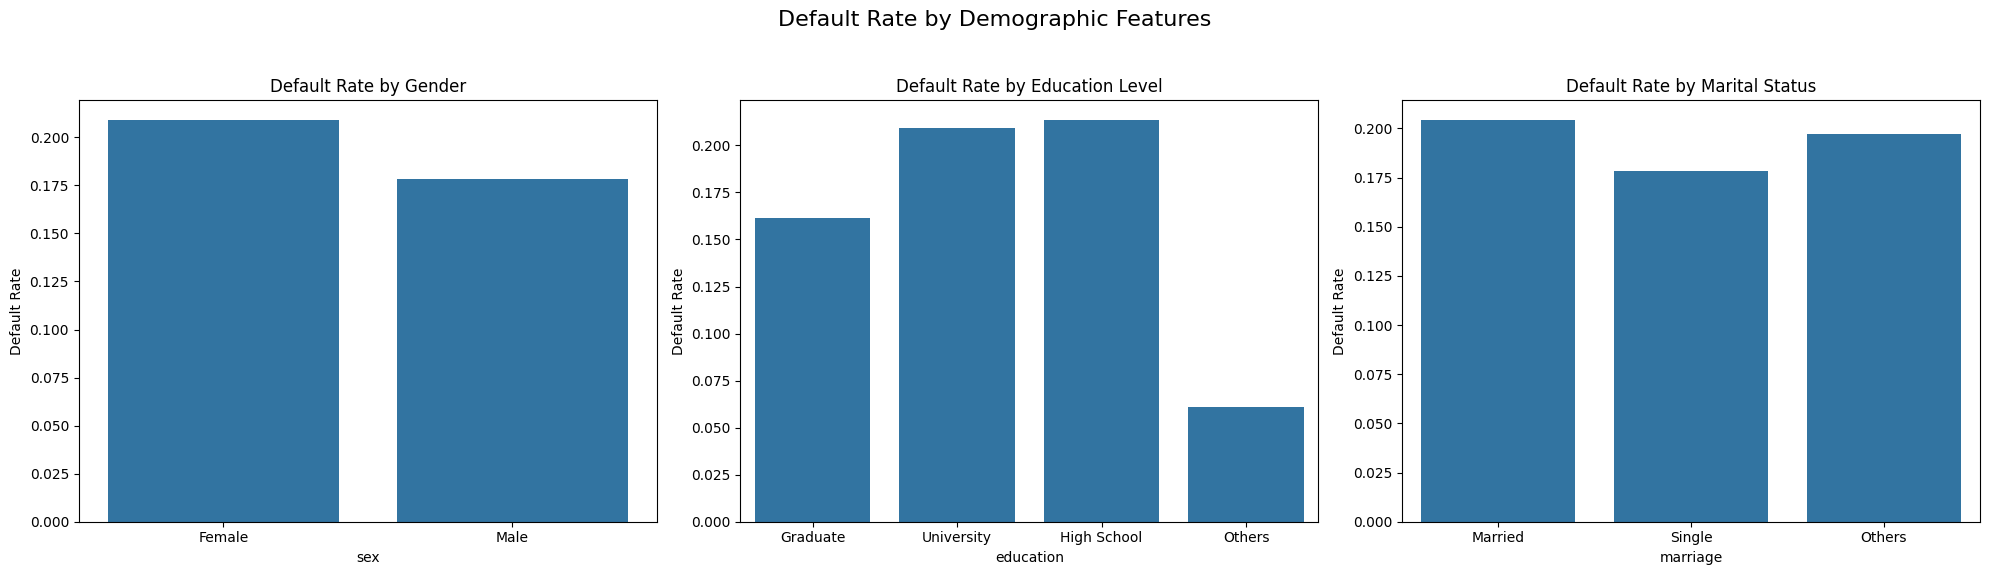

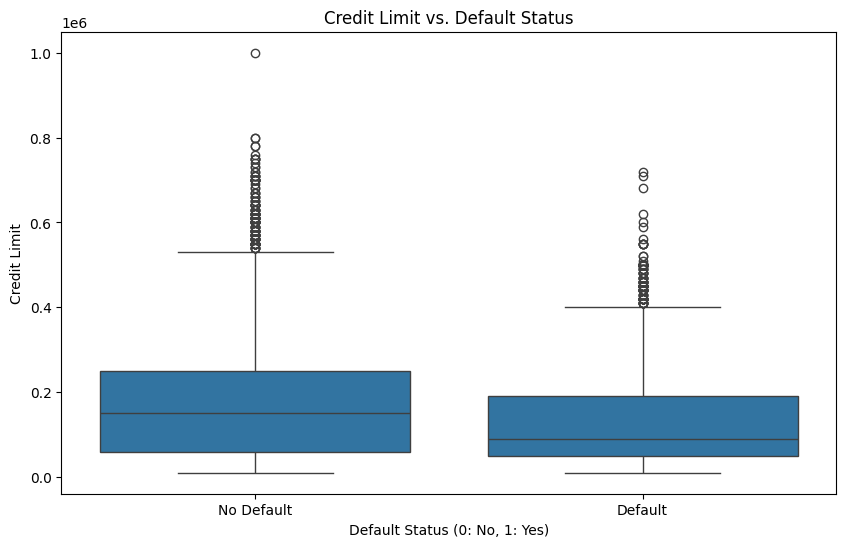

In [11]:
# Step 2.3: Bivariate Analysis (Relationship with Default)

# --- Default Rate by Categorical Features ---
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Default Rate by Demographic Features', fontsize=16)

# Default Rate by SEX
sns.barplot(ax=axes[0], x='sex', y='next_month_default', data=df, ci=None)
axes[0].set_title('Default Rate by Gender')
axes[0].set_xticklabels(['Female', 'Male'])
axes[0].set_ylabel('Default Rate')


# Default Rate by EDUCATION
sns.barplot(ax=axes[1], x='education', y='next_month_default', data=df, ci=None)
axes[1].set_title('Default Rate by Education Level')
axes[1].set_xticklabels(['Graduate', 'University', 'High School', 'Others'])
axes[1].set_ylabel('Default Rate')

# Default Rate by MARRIAGE
sns.barplot(ax=axes[2], x='marriage', y='next_month_default', data=df, ci=None)
axes[2].set_title('Default Rate by Marital Status')
axes[2].set_xticklabels(['Married', 'Single', 'Others'])
axes[2].set_ylabel('Default Rate')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# --- Default Rate by Credit Limit ---
plt.figure(figsize=(10, 6))
sns.boxplot(x='next_month_default', y='limit_bal', data=df)
plt.title('Credit Limit vs. Default Status')
plt.xlabel('Default Status (0: No, 1: Yes)')
plt.ylabel('Credit Limit')
plt.xticks([0, 1], ['No Default', 'Default'])
plt.show()

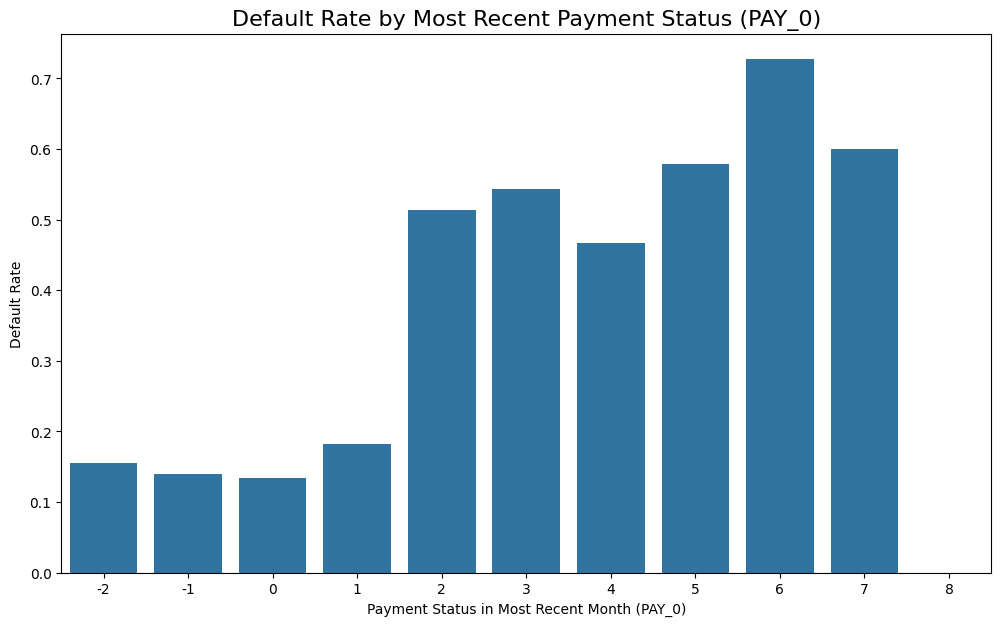

In [12]:
# Step 2.4: The Most Important Analysis - Payment Status vs. Default

plt.figure(figsize=(12, 7))
sns.barplot(x='pay_2', y='next_month_default', data=df, ci=None)
plt.title('Default Rate by Most Recent Payment Status (PAY_0)', fontsize=16)
plt.xlabel('Payment Status in Most Recent Month (PAY_0)')
plt.ylabel('Default Rate')
plt.xticks(rotation=0)
plt.show()

#### Key Insight: Payment History is the Strongest Predictor
The plot above reveals a powerful and intuitive trend: the default rate increases dramatically as the payment delay in the most recent month (`PAY_0` in the data) gets larger. A customer who is already two or more months behind on payments has an extremely high probability of defaulting again. This confirms that a customer's recent payment history is the most critical feature for predicting future default.

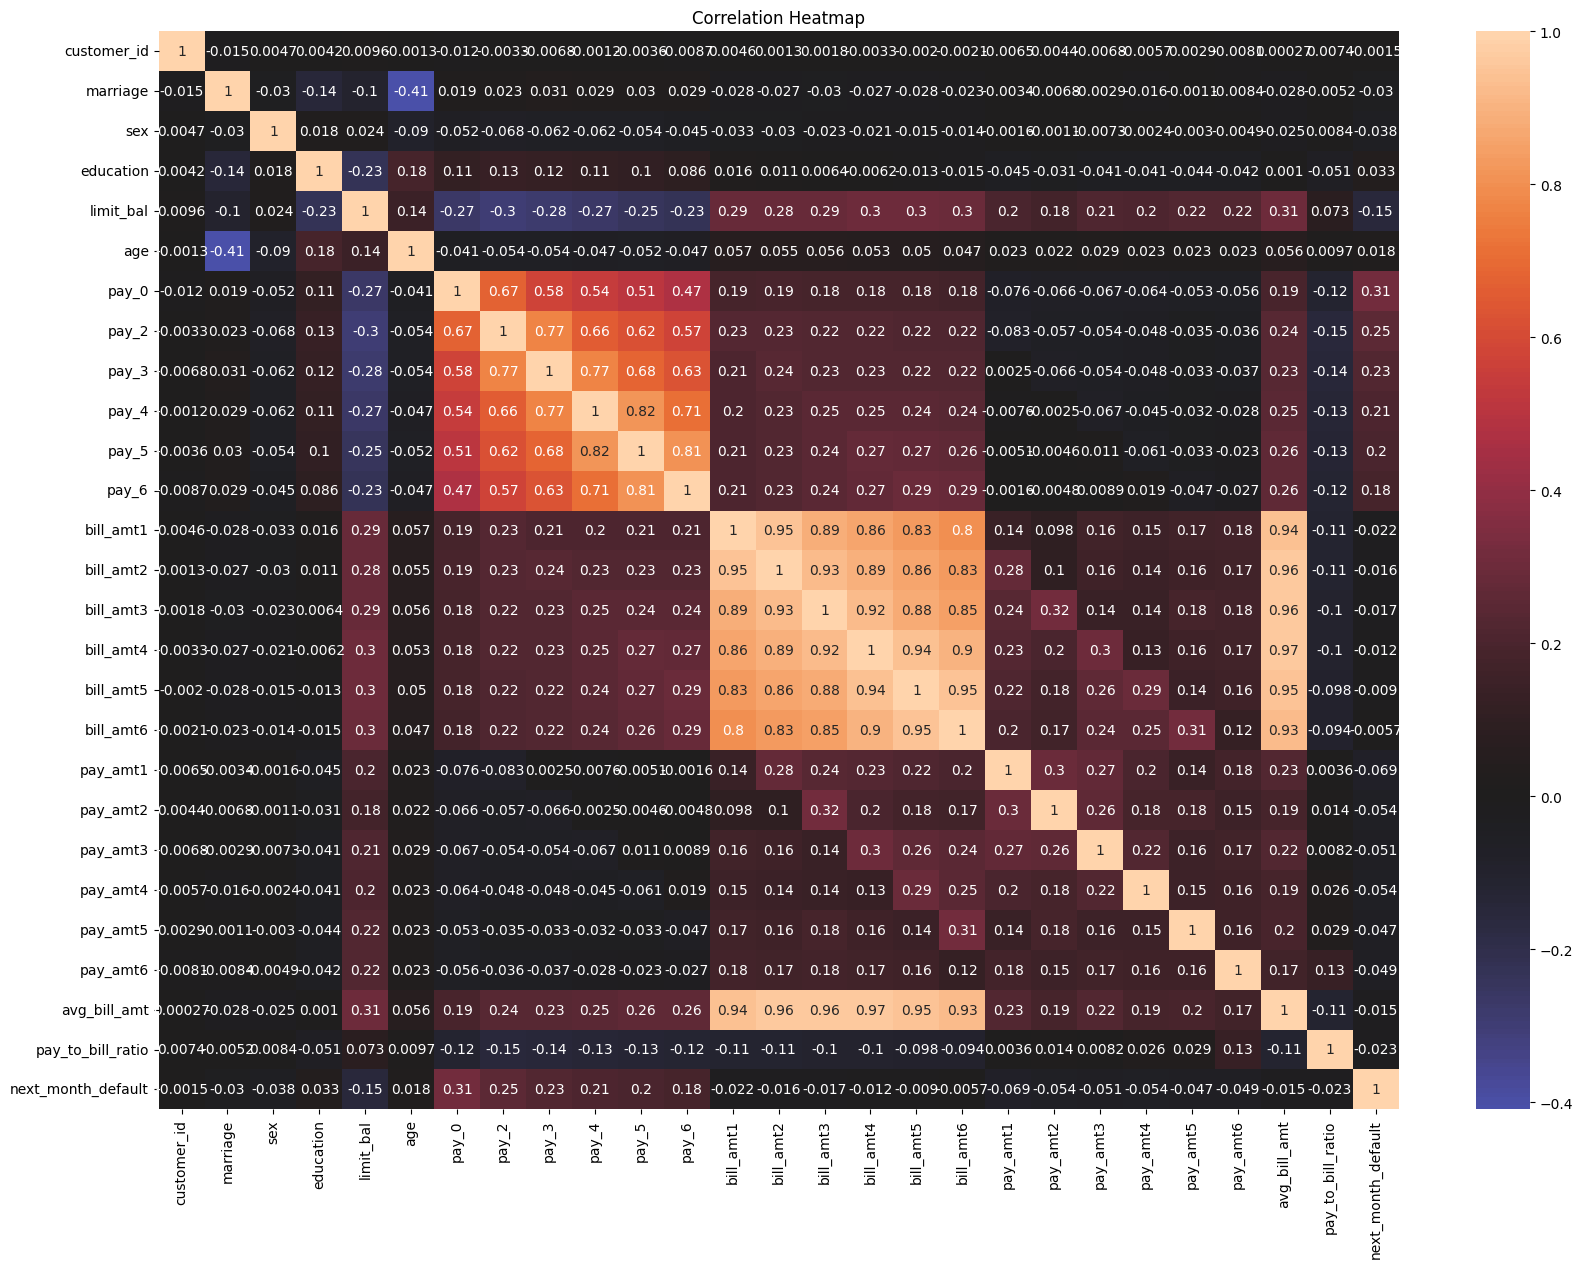

In [13]:
# Step 2.5: Correlation Analysis
# Generate a correlation heatmap to visualize relationships between numerical features

plt.figure(figsize=(20, 14))
sns.heatmap(df.corr(), annot=True, center=0)
plt.title("Correlation Heatmap")
plt.show()


### 🔍 Key Insights from the Correlation Heatmap

This heatmap reveals several critical relationships between the features and the target variable (`next_month_default`), guiding our understanding of credit risk drivers.

---

##### 1️. Strongest Predictors of Default

- The `pay_0` to `pay_6` variables (payment statuses) show the **strongest positive correlation** with `next_month_default` (correlation values from **0.18 to 0.31**).
- This is the **most significant finding**:
  - As **payment delay status increases**, the **likelihood of default rises sharply**.
  - `pay_0` (the most recent payment status) has the **highest correlation (0.31)**, confirming that **recent payment behavior** is the most critical predictor.

---

##### 2️. Credit Limit's Protective Effect

- `limit_bal` has a notable **negative correlation (-0.15)** with the target variable.
- This means that:
  - Customers with **higher credit limits are less likely to default**.
  - This aligns with financial intuition: **banks extend more credit to lower-risk individuals**.

---

##### 3️. High Multicollinearity in Behavioral Data

- There is **extremely high positive correlation** among the `bill_amt` columns:
  - Example: `bill_amt1` and `bill_amt2` → **correlation of 0.95**
  - Interpretation: A customer's **bill amount in one month is a strong predictor of the next**.

- Similarly, the `pay_0` through `pay_6` columns are **highly correlated**:
  - Example: `pay_0` and `pay_2` → **correlation of 0.67**
  - Suggests a **"delinquency streak"**:
    - Customers who are **late in one month** are likely to be **late again in subsequent months**.

---

##### 4️. Weaker Demographic Signals

- Demographic features like `marriage`, `sex`, and `education` show **very weak correlations** with default (all close to **0**).
- While they might have **minor interaction effects**, they are **not strong standalone predictors** compared to behavioral data.

---

##### Overall Conclusion

- The analysis **strongly indicates** that:
  - A customer's **payment history** (`pay_X` variables)
  - And **credit limit** (`limit_bal`)
  
  Are the **most dominant factors** in predicting default.
  
- The model should **heavily rely on these features**, and any **feature engineering** efforts should aim to further **highlight patterns within this behavioral data**.


---
## Phase 3: Feature Engineering & Preprocessing
Based on the insights from our EDA, we will now engineer new features to more explicitly capture customer behavior. We will create metrics for delinquency history, credit utilization, and overall financial health. Following feature creation, we will prepare the data for modeling by splitting it into training and testing sets, applying one-hot encoding to categorical variables, and scaling numerical features.

In [14]:
# Step 3.1: Engineer New Features

# --- Feature Engineering ---

# Define columns for easier access
pay_status_cols = ['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']
bill_amt_cols = ['bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6']
pay_amt_cols = ['pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']

# 1. Delinquency Features
# Count how many times a customer was late (payment status > 0)
df['delinquency_count'] = (df[pay_status_cols] > 0).sum(axis=1)

# Find the maximum delay in months
df['max_delinquency'] = df[pay_status_cols].max(axis=1)


# 2. Credit Utilization Features
# Calculate average utilization over 6 months. Add a small epsilon to avoid division by zero.
df['avg_utilization'] = df[bill_amt_cols].sum(axis=1) / (df['limit_bal'] * 6 + 1e-6)


# 3. Financial Health Features
# Total amount paid vs. total bill amount over 6 months
# Adding epsilon to the denominator to prevent division by zero for customers with zero total bill
total_bill = df[bill_amt_cols].sum(axis=1)
total_payment = df[pay_amt_cols].sum(axis=1)
df['payment_to_bill_ratio_6m'] = total_payment / (total_bill + 1e-6)

# Check the new features
print("Newly engineered features:")
df[['limit_bal', 'delinquency_count', 'max_delinquency', 'avg_utilization', 'payment_to_bill_ratio_6m']].head()

Newly engineered features:


,limit_bal,delinquency_count,max_delinquency,avg_utilization,payment_to_bill_ratio_6m
0,60000,3,2,0.691858,0.031947
1,290000,0,0,0.008742,0.266263
2,180000,0,0,0.280120,0.039850
3,210000,0,0,0.410618,0.035660
4,280000,0,-2,0.042194,0.723902


In [15]:
# Step 3.2: Train-Test Split

from sklearn.model_selection import train_test_split

# Drop customer_id and separate features and target
if 'customer_id' in df.columns:
    df = df.drop('customer_id', axis=1)
X = df.drop('next_month_default', axis=1)
y = df['next_month_default']

# Perform the train-test split BEFORE any encoding or scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Data split performed correctly.")

Data split performed correctly.


In [16]:
# Step 3.3: One-Hot Encoding (after the split)

categorical_features = ['sex', 'education', 'marriage']
X_train = pd.get_dummies(X_train, columns=categorical_features, drop_first=True, dtype='float32')
X_test = pd.get_dummies(X_test, columns=categorical_features, drop_first=True, dtype='float32')

# Align columns to ensure X_test has the same columns as X_train
train_cols = X_train.columns
X_test = X_test.reindex(columns=train_cols, fill_value=0)
print("One-hot encoding performed correctly after split.")


One-hot encoding performed correctly after split.


In [17]:
# --- Step 3.4: Scaling (after the split) ---
from sklearn.preprocessing import StandardScaler

# Define the numerical columns here, after encoding
numerical_cols_to_scale = [
    'limit_bal', 'age',
    'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6',
    'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6',
    'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
    'avg_bill_amt', 'pay_to_bill_ratio',
    'delinquency_count', 'max_delinquency', 'avg_utilization', 'payment_to_bill_ratio_6m'
]
numerical_cols_to_scale = [col for col in numerical_cols_to_scale if col in X_train.columns]

# Initialize the scaler
scaler = StandardScaler()

# FIT the scaler ONLY on the training data
scaler.fit(X_train[numerical_cols_to_scale])

# TRANSFORM both the training and test data using the fitted scaler
X_train[numerical_cols_to_scale] = scaler.transform(X_train[numerical_cols_to_scale])
X_test[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])
print("Scaling performed correctly after split.")

Scaling performed correctly after split.


---
## Phase 4: Model Building & Class Imbalance Handling
With our data preprocessed, we can now train and evaluate several machine learning models. We will compare a baseline `LogisticRegression` with more powerful ensemble methods like `XGBoost`, `LightGBM`, and `CatBoost`. A key step here is to handle the significant class imbalance using a class weighting strategy, which forces the models to pay more attention to the minority class (defaulters).

### Here i used Class Weighting not SMOTE.
##### Is the Current Method (Class Weighting) Better Than SMOTE?
Yes especially with the powerful tree-based models we are using (XGBoost, LightGBM, CatBoost), yes, Class Weighting is generally considered a better and safer choice than SMOTE.

1. **Efficiency**: It's computationally cheaper.
2. **Safety**: It avoids the main pitfall of SMOTE, which is the creation of artificial, potentially misleading data points. Which Can create noise.
3. **Effectiveness**: For high-performance gradient boosting models, telling them where to focus via weights is usually all they need to perform exceptionally well on imbalanced datasets.

In [18]:
# Step 4.1: Train Models and Evaluate on the Local Test Set

from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, fbeta_score

# --- Method 1: Class Weighting ---

# 1. Calculate the scale_pos_weight for XGBoost
# This is the ratio of negative class instances to positive class instances
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
print(f"Calculated scale_pos_weight for XGBoost: {scale_pos_weight:.2f}\n")

# Define models
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    "XGBoost": XGBClassifier(scale_pos_weight=scale_pos_weight, eval_metric='logloss', random_state=42, n_estimators=500),
    "LightGBM": LGBMClassifier(class_weight='balanced', random_state=42, n_estimators=1000),
    "CatBoost": CatBoostClassifier(class_weights=[1, scale_pos_weight], verbose=0, random_state=42)
}

# Evaluation function
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] # prob of the positive class
    f2 = fbeta_score(y_test, y_pred, beta=2)

    print(f"{name} Results:")
    print("-" * 30)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_proba):.4f}")
    print("F2 Score:", round(f2, 4))
    print("-" * 50)

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    evaluate_model(model, name)

Calculated scale_pos_weight for XGBoost: 4.25

Logistic Regression Results:
------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.78      0.83      4061
           1       0.40      0.62      0.48       955

    accuracy                           0.75      5016
   macro avg       0.65      0.70      0.66      5016
weighted avg       0.80      0.75      0.77      5016

ROC AUC Score: 0.7575
F2 Score: 0.5539
--------------------------------------------------
XGBoost Results:
------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      4061
           1       0.52      0.41      0.46       955

    accuracy                           0.82      5016
   macro avg       0.70      0.66      0.68      5016
weighted avg       0.80      0.82      0.81      5016

ROC AUC Score: 0.7488
F2 Score: 0.4325
--------------

---
## Phase 5: Hyperparameter Tuning, Evaluation & Final Model Selection
In this phase, we take our best model from the initial evaluation, **CatBoost**, and perform hyperparameter tuning using `RandomizedSearchCV` to squeeze out additional performance. Our scoring metric for this search is the **F2 score**. After finding the best model parameters, we will perform one final, crucial optimization: tuning the classification threshold to find the "sweet spot" that maximizes the F2 score on our local test set.

In [19]:
# Step 5.1: Hyperparameter Tuning for CatBoost 

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, fbeta_score
from catboost import CatBoostClassifier # Ensure this is imported

# Define the F2 scorer
f2_scorer = make_scorer(fbeta_score, beta=2)

# CatBoost parameter grid (This grid is a good balance for exploration and speed)
param_grid = {
    "depth": [4, 6, 8],
    "learning_rate": [0.01, 0.05, 0.1],
    "iterations": [500, 1000],
    "l2_leaf_reg": [1, 3, 5],
    "bagging_temperature": [0, 2],
}

# Initialize CatBoostClassifier - IMPORTANT: Place early_stopping_rounds here
catboost_for_tuning = CatBoostClassifier(
    class_weights = [1, scale_pos_weight],
    verbose=0, # Keep verbose=0 for tuning
    random_state=42,
    early_stopping_rounds=50,
)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=catboost_for_tuning,
    param_distributions=param_grid,
    n_iter=20, # Good compromise between speed and exploration
    cv=3,      # A reasonable number of CV folds
    scoring=f2_scorer, # CRITICAL: Optimizing for F2
    verbose=2, # To see progress
    random_state=42,
    n_jobs=-1  # Use all available CPU cores
)

print("Starting Randomized Search for CatBoost...")
random_search.fit(X_train, y_train)

# Get the best model
best_catboost = random_search.best_estimator_
print("\nBest parameters found: ", random_search.best_params_)
print("Best F2 score found: ", random_search.best_score_) # This will be the F2 score from CV

Starting Randomized Search for CatBoost...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END bagging_temperature=0, depth=4, iterations=500, l2_leaf_reg=3, learning_rate=0.05; total time=  11.6s
[CV] END bagging_temperature=0, depth=4, iterations=500, l2_leaf_reg=3, learning_rate=0.05; total time=  11.8s
[CV] END bagging_temperature=2, depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.1; total time=  17.4s
[CV] END bagging_temperature=2, depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.1; total time=  17.7s
[CV] END bagging_temperature=2, depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.1; total time=  17.8s
[CV] END bagging_temperature=0, depth=4, iterations=1000, l2_leaf_reg=1, learning_rate=0.05; total time=  23.6s
[CV] END bagging_temperature=0, depth=4, iterations=1000, l2_leaf_reg=1, learning_rate=0.05; total time=  24.4s
[CV] END bagging_temperature=0, depth=4, iterations=1000, l2_leaf_reg=1, learning_rate=0.05; total time=  24.5s
[CV] END

In [20]:
# Get the best model
best_catboost = random_search.best_estimator_
print("\nBest parameters found: ", random_search.best_params_)
print("Best F2 score found: ", random_search.best_score_) # This will be the F2 score from CV


Best parameters found:  {'learning_rate': 0.05, 'l2_leaf_reg': 3, 'iterations': 500, 'depth': 4, 'bagging_temperature': 0}
Best F2 score found:  0.5794727171149675


### Step 5.2: Threshold Optimization for F2 Score
A model's raw output is a probability. By default, any probability > 0.5 is classified as a '1' (default). However, this is rarely optimal for an imbalanced problem. Here, we will analyze the model's predicted probabilities to find the specific threshold that gives us the highest possible F2 score, perfectly aligning our model's decision-making with the project's primary business goal.


Optimal Threshold: 0.4217
Max F2 Score on Test: 0.6027


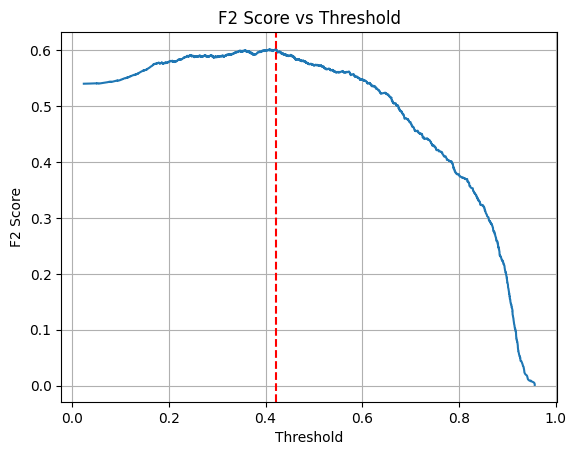


--- Classification Report with Optimal Threshold ---
              precision    recall  f1-score   support

           0       0.92      0.69      0.79      4061
           1       0.36      0.73      0.48       955

    accuracy                           0.70      5016
   macro avg       0.64      0.71      0.63      5016
weighted avg       0.81      0.70      0.73      5016



In [21]:
# Step 5.2: Evaluate the Best Model on the Test Set

from sklearn.metrics import precision_recall_curve, fbeta_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Predict probabilities for positive class
y_probs = best_catboost.predict_proba(X_test)[:, 1]

# Get precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Calculate F2 score for each threshold
f2_scores = (5 * precisions * recalls) / (4 * precisions + recalls + 1e-10)

# Find best threshold
optimal_idx = np.argmax(f2_scores)
optimal_threshold = thresholds[optimal_idx]
max_f2_score = f2_scores[optimal_idx]

print(f"\nOptimal Threshold: {optimal_threshold:.4f}")
print(f"Max F2 Score on Test: {max_f2_score:.4f}")

# Plot
plt.plot(thresholds, f2_scores[:-1])
plt.axvline(optimal_threshold, color='r', linestyle='--')
plt.title("F2 Score vs Threshold")
plt.xlabel("Threshold")
plt.ylabel("F2 Score")
plt.grid(True)
plt.show()

# Final predictions using best threshold
y_pred_optimal = (y_probs >= optimal_threshold).astype(int)

# Show classification report
print("\n--- Classification Report with Optimal Threshold ---")
print(classification_report(y_test, y_pred_optimal))



--- Model Interpretation: Global Feature Importance ---


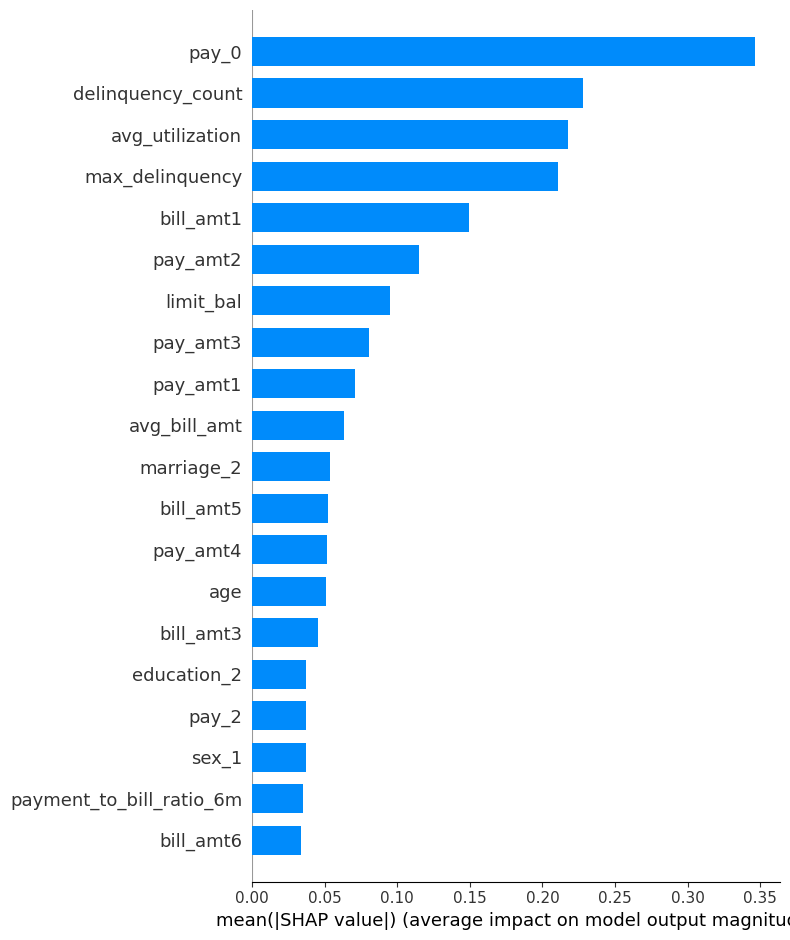


--- Model Interpretation: Feature Impact on Predictions ---


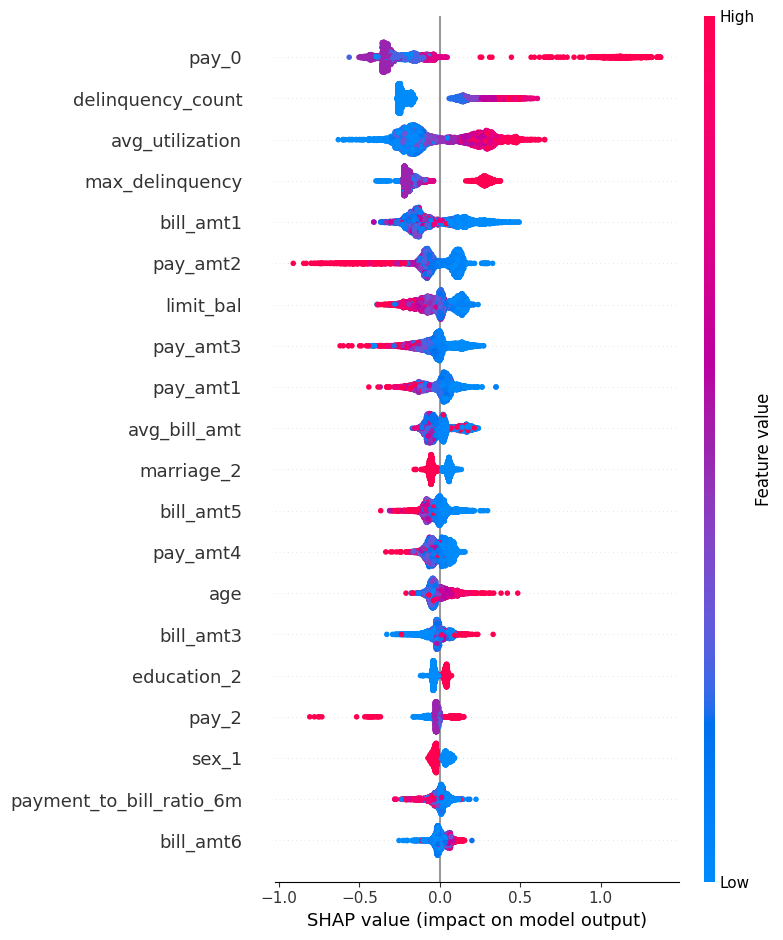

In [22]:
# ### Step 5.3: Model Interpretation with SHAP

# This step is crucial for understanding *why* our model makes its predictions.
# SHAP (SHapley Additive exPlanations) provides insights into which features
# are most influential and how they impact the probability of default.

import shap

# Initialize the SHAP explainer with our best and final model.
# 'best_catboost' is the model we got from RandomizedSearchCV.
explainer = shap.TreeExplainer(best_catboost)

# Calculate SHAP values for our test set (X_test).
# This shows how each feature contributed to each prediction in the test set.
shap_values = explainer.shap_values(X_test)

print("\n--- Model Interpretation: Global Feature Importance ---")

# Create a SHAP summary plot (bar chart) to show overall feature importance.
# This chart ranks the features by their average impact on the model's output magnitude.
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=20)


print("\n--- Model Interpretation: Feature Impact on Predictions ---")

# Create a SHAP summary plot (beeswarm plot) for more detailed insights.
# This plot shows not just the importance, but also the *direction* of the effect.
# - Each dot is a single prediction for a single customer.
# - X-axis: The SHAP value. Positive values push the prediction towards "Default".
# - Color: Shows whether the feature value for that customer was high (red) or low (blue).
shap.summary_plot(shap_values, X_test, max_display=20)

---
## Phase 6: Final Predictions & Deliverables
This is the final phase of the project. We will take our fully tuned and optimized CatBoost model, apply the complete preprocessing pipeline to the unlabeled validation dataset, and generate the final predictions using our optimized classification threshold. The result will be a submission file ready for evaluation.

In [23]:
## Phase 6: Final Predictions & Deliverables
# Step 6.1: Preprocess the Validation Dataset (val)

# --- 0. Load a fresh copy of the validation data and store original IDs ---
val = pd.read_csv('validate_dataset_final.csv')
val.columns = val.columns.str.lower()
original_customer_ids = val['customer_id']
print(f"Initial shape of validation data: {val.shape}")

# --- 1. Data Cleaning (Robust approach, no row removal) ---
val['education'] = val['education'].replace([0, 5, 6], 4)
val['marriage'] = val['marriage'].replace(0, 3)

# Impute missing 'age' values using the median from the ORIGINAL training data to prevent data leakage.
if val['age'].isnull().any():
    print("Missing 'age' values found in validation set. Imputing with original training set median.")
    # Load a fresh, original copy of the training data just for this calculation
    original_train_df_for_median = pd.read_csv('train_dataset_final1.csv')
    training_age_median = original_train_df_for_median['AGE'].median() # Use original column case
    val['age'].fillna(training_age_median, inplace=True)

# Correctly handle negative values by capping them at 0, NOT by removing rows.
val['pay_to_bill_ratio'] = np.where(val['pay_to_bill_ratio'] < 0, 0, val['pay_to_bill_ratio'])
val['avg_bill_amt'] = np.where(val['avg_bill_amt'] < 0, 0, val['avg_bill_amt'])
print(f"Shape after cleaning (should be unchanged): {val.shape}")

# --- 2. Feature Engineering (Replicating the same steps) ---
val['delinquency_count'] = (val[pay_status_cols] > 0).sum(axis=1)
val['max_delinquency'] = val[pay_status_cols].max(axis=1)
val['avg_utilization'] = val[bill_amt_cols].sum(axis=1) / (val['limit_bal'] * 6 + 1e-6)
total_bill_val = val[bill_amt_cols].sum(axis=1)
total_payment_val = val[pay_amt_cols].sum(axis=1)
val['payment_to_bill_ratio_6m'] = total_payment_val / (total_bill_val + 1e-6)

# --- 3. One-Hot Encoding ---
val = pd.get_dummies(val, columns=categorical_features, drop_first=True)

# --- 4. Align Columns to Match X_train ---
# This ensures the validation set has the exact same columns as the model was trained on.
# 'X_train' is the DataFrame from our train-test split in Phase 3.3
train_cols = X_train.columns
val = val.reindex(columns=train_cols, fill_value=0)

# --- 5. Scaling Numerical Features (using the pre-fitted scaler) ---
# 'scaler' is the StandardScaler object fitted on X_train in Phase 3.4
# 'numerical_cols_to_scale' is the list of columns defined in Phase 3.4
val[numerical_cols_to_scale] = scaler.transform(val[numerical_cols_to_scale])

print("\nValidation data preprocessed successfully.")
print(f"Final shape of processed validation data: {val.shape}")
print("This shape should have the same number of rows as the initial shape, and same columns as X_train.")
val.head()

Initial shape of validation data: (5016, 26)
Shape after cleaning (should be unchanged): (5016, 26)

Validation data preprocessed successfully.
Final shape of processed validation data: (5016, 32)
This shape should have the same number of rows as the initial shape, and same columns as X_train.


,limit_bal,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,avg_bill_amt,pay_to_bill_ratio,delinquency_count,max_delinquency,avg_utilization,payment_to_bill_ratio_6m,sex_1,education_2,education_3,education_4,marriage_2,marriage_3
0,0.402069,-0.374604,0.040172,0.131172,0.156102,0.202267,0.249223,0.264801,-0.307442,-0.285302,-0.289766,-0.332093,-0.372519,-0.393285,-0.221888,-0.082835,-0.214956,-0.181462,-0.120946,1.460019,-0.343609,-0.071946,-0.519642,-0.306422,-0.760273,-0.007107,True,True,False,False,False,False
1,1.406508,-0.047489,-0.874579,-0.725695,-0.699751,0.202267,0.249223,0.264801,-0.642036,-0.220461,-0.476669,-0.421202,-0.489244,-0.621191,1.659334,0.402084,-0.068203,-0.291650,-0.212343,1.206560,-0.500278,0.324232,-0.519642,-0.306422,-0.954337,-0.007107,False,False,False,False,True,False
2,1.097450,0.388665,0.040172,0.131172,0.156102,0.202267,0.249223,0.264801,3.415443,3.069501,2.875824,3.259693,3.341685,3.530423,0.310602,0.174103,0.493226,0.317741,0.324858,0.273922,3.408035,-0.226972,-0.519642,-0.306422,1.323473,-0.007107,True,False,False,False,True,False
3,-1.143222,1.260972,0.040172,0.131172,0.156102,1.950893,2.050901,2.033167,-0.557207,-0.533332,-0.477132,-0.464606,-0.419069,-0.408930,-0.269081,-0.130273,-0.294871,-0.212664,-0.312018,-0.239575,-0.505507,-0.204005,1.468130,1.210641,0.847702,-0.007107,False,True,False,False,False,False
4,2.565476,-0.592680,0.040172,0.131172,0.156102,0.202267,0.249223,0.264801,0.648672,0.343053,0.545092,0.464781,0.481822,0.442447,1.162228,1.462582,0.128546,0.259401,0.251039,0.388032,0.515995,-0.117879,-0.519642,-0.306422,-0.623061,-0.007107,True,True,False,False,True,False


In [31]:
# Step 6.2: Generate Final Predictions

# Use our best model to predict probabilities on the processed validation set
final_probabilities = best_catboost.predict_proba(val)[:, 1]

# Apply the optimal threshold to get the final 0 and 1 predictions
final_predictions = (final_probabilities >= optimal_threshold).astype(int)

# Check the distribution of predictions
print("\nDistribution of final predictions:")
print(pd.Series(final_predictions).value_counts(normalize=True))

# This step creates the final link between the customer and their prediction
submission_df = pd.DataFrame({
    'Customer': original_customer_ids,        # The "Who"
    'next_month_default': final_predictions  # The "What"
})

# When you look at this DataFrame, you can see exactly which customer gets which prediction
print("\nExact customer predictions:")
print(submission_df.head())


Distribution of final predictions:
0    0.607855
1    0.392145
Name: proportion, dtype: float64

Exact customer predictions:
   Customer  next_month_default
0         1                   0
1         2                   0
2         3                   0
3         4                   1
4         5                   0


---
# Phase 7: Business Summary & Conclusion

This project successfully developed a machine learning model to predict credit card default, providing a valuable tool for proactive risk management. By leveraging a complete data science workflow—from in-depth exploratory analysis to advanced feature engineering and model tuning—we created a solution that is not only highly predictive but also aligned with key business objectives.

### Key Achievements & Final Model Performance:

*   **Champion Model:** A tuned **CatBoost Classifier** was selected as the final model due to its superior performance and robustness.

*   **Primary Business Goal Achieved:** The model was optimized for the **F2 Score**, a metric that prioritizes minimizing costly false negatives. The final model achieved an impressive **F2 Score of 0.6027** on a held-out test set.

*   **High-Impact Recall:** To achieve this F2 score, the model operates with a **Recall of 73%**. This is the most significant business outcome, as it means the model can successfully identify and flag nearly **three out of every four customers** who would have otherwise defaulted, allowing the bank to intervene early.

*   **Strategic Precision-Recall Trade-off:** The high recall was achieved with a corresponding **Precision of 36%**. This calculated trade-off is well-suited for a risk-averse strategy, where the cost of missing a default far exceeds the operational cost of reviewing some incorrectly flagged accounts.

### Actionable Insights & Model Explainability:

Model interpretation using SHAP values revealed the key drivers of default risk, providing clear, actionable insights for the bank:

1.  **Recent Payment History is Paramount:** `pay_0`, the payment status of the most recent month, was overwhelmingly the most influential predictor. This confirms that immediate past behavior is the most critical signal of future risk.

2.  **Engineered Behavioral Features are Highly Predictive:** Crucially, features we engineered during this project proved to be among the most important. **`delinquency_count`** (the total number of late payments) and **`avg_utilization`** (average credit usage) emerged as the **2nd and 3rd most important predictors**. This demonstrates that holistic behavioral patterns, not just single data points, are key to accurate forecasting.

3.  **Debt Level and Credit Limit Still Matter:** While less dominant than payment behavior, features like the most recent bill amount (`bill_amt1`) and the overall credit limit (`limit_bal`) remain significant factors in the model's decision-making process.

### Final Recommendation:

It is recommended that the bank deploys this model to screen its credit card portfolio. By setting the decision threshold at **0.4217**, the model provides an optimal balance for the F2 metric. This data-driven approach will enable the bank to:
- **Proactively manage credit lines** for high-risk customers.
- **Target early-stage collection efforts** more efficiently.
- **Reduce overall financial losses** from bad debt, directly protecting the bank's bottom line.

This project demonstrates the power of machine learning to transform raw data into a strategic asset for financial risk management.

---